# ECEN 4293:  Interactive PyTorch Operations with Colab
In this notebook, you will practice some basic operations in PyTorch, such as addition, matrix multiplication, and other tensor operations. Each section will ask you to perform a specific operation, and you'll write the code to perform the task.

Let's begin!

## Using PyTorch

PyTorch is an open-source deep learning framework developed by Facebook’s AI Research lab (FAIR). It is widely used for building and training machine learning models, particularly neural networks, due to its ease of use, flexibility, and dynamic computational graph system.

### Summary of PyTorch Advantages:
1.	Dynamic Computation Graphs: Easier to debug and more flexible compared to static frameworks.
2.	Automatic Differentiation: Built-in support for computing gradients and backpropagation.
3.	GPU Acceleration: Easy to move computations to the GPU.
4.	Modular and Flexible: Extensible modules for building complex neural networks.
5.	Large Ecosystem: Libraries for computer vision, NLP, audio processing, and more.
6.	Research-Oriented: Widely used in academia and research.
7.	Strong Python Integration: Works seamlessly with Python and Python-based tools.

### Use on Colab

Google Colab is a great environment to run PyTorch code because it provides free access to GPUs and TPUs for accelerated computation, making it ideal for deep learning tasks.

Using PyTorch on Google Colab is a highly effective way to train models, experiment with deep learning, and leverage free GPU or TPU resources. With easy access to hardware accelerators, integration with Google Drive, and pre-installed libraries, Colab makes it very convenient for both beginners and experienced researchers to build, train, and test models.

### Using GPUs on Colab

By default, Colab runs on a CPU. To use a GPU for accelerated computation, you need to switch the runtime to use a GPU.

Steps to Enable GPU:

1.	Go to Runtime > Change runtime type.
2.	In the popup window, under Hardware accelerator, choose GPU.
3.	Click Save.

### What are TPUs

Google Colab also provides access to TPUs (Tensor Processing Units), which are optimized for training large machine learning models. However, working with TPUs in PyTorch requires the use of torch_xla, a package specifically designed for PyTorch-TPU integration.  

### Setting up for PyTorch

Setting up PyTorch is relatively straightforward and can be done in various environments depending on your needs (e.g., local machine, cloud services like Google Colab, or a virtual environment).


In [65]:
# Basic Setup
import torch
print("Using torch", torch.__version__)

Using torch 2.4.1+cu121


At the time of writing this tutorial (October 2024), the current stable version is 2.4. You should therefore see the output Using torch 2.4.1, eventually with some extension for the CUDA version on Colab. In case you use the dl2024 environment, you should see Using torch 2.4.1. In general, it is recommended to keep the PyTorch version updated to the newest one. If you see a lower version number than 2.3, make sure you have installed the correct environment, or ask us. In case PyTorch 2.5 or newer will be published during the time of the course, don't worry. The interface between PyTorch versions doesn't change too much, and hence all code should also be runnable with newer versions.
As in every machine learning framework, PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.

In [66]:
torch.manual_seed(42) # Setting the seed

### Tensors

Tensors are the PyTorch equivalent to Numpy arrays, with the addition to also have support for GPU acceleration (more on that later).
The name "tensor" is a generalization of concepts you already know. For instance, a vector is a 1-D tensor, and a matrix a 2-D tensor. When working with neural networks, we will use tensors of various shapes and number of dimensions.

Most common functions you know from numpy can be used on tensors as well. Actually, since numpy arrays are so similar to tensors, we can convert most tensors to numpy arrays (and back) but we don't need it too often.

#### Initialization

Let's first start by looking at different ways of creating a tensor. There are many possible options, the simplest one is to call `torch.Tensor` passing the desired shape as input argument:

In [67]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[ 8.3382e-10,  4.2957e-05,  1.6536e-04,  1.2812e-11],
         [ 3.2918e-09,  3.2505e+21,  1.3353e-08,  1.2752e+16],
         [ 1.3452e-43,  0.0000e+00,  1.3452e-43,  0.0000e+00]],

        [[-1.7598e-26,  7.0065e-45,  5.0447e-44,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  5.3179e+22,  2.0943e+23,  5.2476e-08]]])


The function `torch.Tensor` allocates memory for the desired tensor, but reuses any values that have already been in the memory. To directly assign values to the tensor during initialization, there are many alternatives including:

* `torch.zeros`: Creates a tensor filled with zeros
* `torch.ones`: Creates a tensor filled with ones
* `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
* `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
* `torch.arange`: Creates a tensor containing the values $N,N+1,N+2,...,M$
* `torch.Tensor` (input list): Creates a tensor from the list elements you provide

In [68]:
# Create a tensor from a (nested) list
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [69]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


You can obtain the shape of a tensor in the same way as in numpy (`x.shape`), or using the `.size` method:

In [70]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


#### Tensor to Numpy, and Numpy to Tensor

Tensors can be converted to numpy arrays, and numpy arrays back to tensors. To transform a numpy array into a tensor, we can use the function `torch.from_numpy`:

In [71]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


*To* transform a PyTorch tensor back to a numpy array, we can use the function `.numpy()` on tensors:

In [72]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


#### Operations

Most operations that exist in numpy, also exist in PyTorch. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#), but we will review the most important ones here.

The simplest operation is to add two tensors:

In [73]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


Calling `x1 + x2` creates a new tensor containing the sum of the two inputs. However, we can also use in-place operations that are applied directly on the memory of a tensor. We therefore change the values of `x2` without the chance to re-accessing the values of `x2` before the operation. An example is shown below:

In [74]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (before) tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
X1 (after) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (after) tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


In-place operations are usually marked with a underscore postfix (e.g. "add_" instead of "add").

Another common operation aims at changing the shape of a tensor. A tensor of size (2,3) can be re-organized to any other shape with the same number of elements (e.g. a tensor of size (6), or (3,2), ...). In PyTorch, this operation is called `view`:

In [75]:
x = torch.arange(6)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])


In [76]:
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [77]:
x = x.permute(1, 0) # Swapping dimension 0 and 1
print("X", x)

X tensor([[0, 3],
        [1, 4],
        [2, 5]])


Other commonly used operations (discussed in class) include matrix multiplications, which are essential for neural networks. Quite often, we have an input vector $\mathbf{x}$, which is transformed using a learned weight matrix $\mathbf{W}$. There are multiple ways and functions to perform matrix multiplication, some of which we list below:

* `torch.matmul`: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)). Can also be written as `a @ b`, similar to numpy.
* `torch.mm`: Performs the matrix product over two matrices, but doesn't support broadcasting (see [documentation](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))
* `torch.bmm`: Performs the matrix product with a support batch dimension. If the first tensor $T$ is of shape ($b\times n\times m$), and the second tensor $R$ ($b\times m\times p$), the output $O$ is of shape ($b\times n\times p$), and has been calculated by performing $b$ matrix multiplications of the submatrices of $T$ and $R$: $O_i = T_i @ R_i$
* `torch.einsum`: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention.

Usually, we use `torch.matmul` or `torch.bmm`. We can try a matrix multiplication with `torch.matmul` below.

In [78]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [79]:
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [80]:
h = torch.matmul(x, W) # Verify the result by calculating it by hand too!
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


#### Indexing

We often have the situation where we need to select a part of a tensor. Indexing works just like in numpy, so let's try it:

In [81]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [82]:
print(x[:, 1])   # Second column

tensor([1, 5, 9])


In [83]:
print(x[:2, -1]) # First two rows, last column

tensor([3, 7])


In [84]:
print(x[1:3, :]) # Middle two rows

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


# October 14, 2024 work starts here

Before you begin, let's try a traditional matrix multiply with NumPy too.

## 0. Matrix Multiply with CPU with NumPy

**Exercise 1:** Calculate $-2E$, $G+F$, $4F-G$, $HG$, and $GE$ using the following matrix definitions.  Do the exercise on paper first, then check by doing the calculation with NumPy arrays.  Let's use the randomization function in NumPy to help.

In [ ]:
## Code solution here
import numpy as np

# Create a random matrix of size (rows x cols)
E = np.random.randn(2, 1)
print(E, '\n', sep='')

F = np.random.randn(3, 2)
print(F, '\n', sep='')

G = np.random.randn(3, 2)
print(G, '\n', sep='')

H = np.random.randn(3, 3)
print(H, '\n', sep='')


## 1. Tensor Addition
**Task**: Create two 2x2 tensors and add them together using PyTorch.

Write your solution below:

In [85]:
# TODO: Create two 2x2 tensors and add them together
A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])

print("Tensor A:\n", A)
print("Tensor B:\n", B)

# Add the tensors


Tensor A:
 tensor([[1, 2],
        [3, 4]])
Tensor B:
 tensor([[5, 6],
        [7, 8]])


## 2. Matrix Multiplication
**Task**: Create two 2x3 and 3x2 tensors and multiply them together using matrix multiplication in PyTorch.

Write your solution below:

In [86]:
# TODO: Create two tensors (A: 2x3 and B: 3x2) and multiply them
A = torch.tensor([[1, 2, 3], [4, 5, 6]])
B = torch.tensor([[7, 8], [9, 10], [11, 12]])

# Perform matrix multiplication


## 3. Element-wise Multiplication
**Task**: Create two 2x3 tensors and perform element-wise multiplication.

Write your solution below:

In [87]:
# TODO: Create two tensors and perform element-wise multiplication
A = torch.tensor([[1, 2, 3], [4, 5, 6]])
B = torch.tensor([[7, 8, 9], [10, 11, 12]])

# Perform element-wise multiplication


## 4. Tensor Reshaping
**Task**: Create a tensor of shape (2x4) and reshape it into a (4x2) tensor using PyTorch's `view()` function.

Write your solution below:

In [88]:
# TODO: Create a 2x4 tensor and reshape it to 4x2
A = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])

# Reshape the tensor using the view function


## 5. Tensor Broadcasting
**Task**: Use PyTorch's broadcasting feature to add a 1x3 tensor to a 3x3 tensor.  Again, tensor Broadcasting in PyTorch (and other deep learning frameworks like NumPy) refers to a set of rules that allow for element-wise operations on tensors of different shapes, without explicitly replicating data.

Broadcasting enables PyTorch to perform arithmetic operations (like addition, multiplication, etc.) on tensors that don’t have exactly the same shape, but are compatible according to specific broadcasting rules.

### Broadcasting Rules

When performing operations on tensors with different shapes, PyTorch automatically broadcasts them to a common shape by following these rules:

1.	If the tensors have a different number of dimensions, the one with fewer dimensions is padded with ones on the left side until they have the same number of dimensions.
2.	Tensors are compatible when their dimensions match or one of the dimensions is 1. If a dimension is 1 in one tensor and a larger value in the other tensor, the smaller tensor is “stretched” along that axis to match the larger one.
3.	Once the tensors are compatible, PyTorch performs the operation element-wise as if the smaller tensor had been expanded to match the shape of the larger tensor. However, no actual copying of data occurs, which is efficient both in terms of speed and memory.

### Advantages/Disadvantages

*	Advantage: PyTorch tensors support broadcasting, which allows for operations on tensors of different shapes without explicitly reshaping them. This capability simplifies code and enhances performance when dealing with tensors of different sizes.
*	Difference: While NumPy also supports broadcasting, PyTorch allows this functionality to extend to deep learning tasks and GPU-accelerated computations.

Write your solution below:

In [89]:
# TODO: Use broadcasting to add a 1x3 tensor to a 3x3 tensor
A = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = torch.tensor([10, 20, 30])

# Add with broadcasting
C = A + B
print("Broadcasted Addition:\n", C)

Broadcasted Addition:
 tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])


## 6. Batch Matrix Multiplication
**Task**: Batch matrix multiplication is used to perform matrix multiplication on batched 3D tensors. Each slice along the batch dimension is treated as a separate matrix multiplication, and it applies matrix multiplication to all the slices at once.

The input tensors to torch.bmm must be 3-dimensional, where:

*	The first dimension is the batch size.
*	The second and third dimensions represent the matrices to be multiplied.

The shape of the tensors should be (batch_size, n, m) and (batch_size, m, p). The result will have shape (batch_size, n, p).

Write your solution below:

In [90]:
# Define two 3D tensors (batch_size, n, m) and (batch_size, m, p)
# A is of shape (2, 2, 3) -> two 2x3 matrices
A = torch.tensor([[[1, 2, 3], [4, 5, 6]],    # First 2x3 matrix
                  [[7, 8, 9], [10, 11, 12]]]) # Second 2x3 matrix

# B is of shape (2, 3, 2) -> two 3x2 matrices
B = torch.tensor([[[1, 4], [2, 5], [3, 6]],    # First 3x2 matrix
                  [[7, 10], [8, 11], [9, 12]]]) # Second 3x2 matrix

# Perform batch matrix multiplication (bmm)

## 7. Einstein Summation

Einstein summation is a powerful and flexible function in PyTorch that allows for complex tensor operations using Einstein summation notation. It is useful for performing operations such as tensor contraction, transpose, inner products, and outer products with minimal code.

Here’s how the Einstein summation convention works:

*	The subscripts represent the axes of the tensors.
*	The same subscript between two tensors implies summation along that axis (like matrix multiplication).
*	Unmatched subscripts represent the axes to be retained in the output.

### Notation for Matrix Multiplication

The notation 'ik,kj->ij' in the torch.einsum function corresponds directly to the mathematical Einstein summation convention for matrix multiplication:
* ik: Refers to the two dimensions of matrix A (rows i, columns k).
* kj: Refers to the two dimensions of matrix B (rows k, columns j).
* ->ij: This indicates that the output will have dimensions i and j (the rows of A and the columns of B).
* This notation effectively performs matrix multiplication by summing over the k axis.

### Outer Product

The outer product of two vectors results in a matrix, where each element is the product of corresponding elements from the two vectors.

The notation 'i,j->ij' means:
*	i: Refers to the first vector A.
*	j: Refers to the second vector B.
*	->ij: This indicates that the output will have dimensions i and j (forming a matrix).

The result is a matrix where each element is the product of corresponding elements from A and B.

### Summation over Specific Axes

You can also use torch.einsum to sum over specific axes of a tensor.

The notation 'ij->i' means:
*	ij: Refers to a 2D tensor (matrix A).
*	->i: This means we sum over the j axis (columns) to keep only the i axis (rows).


In [91]:
# Define two 2D tensors (matrices)
A = torch.tensor([[1, 2], [3, 4]])  # Shape: (2, 2)
B = torch.tensor([[5, 6], [7, 8]])  # Shape: (2, 2)

# Matrix multiplication using einsum

# Outer product using einsum
A = torch.tensor([1, 2, 3])  # Shape: (3)
B = torch.tensor([4, 5, 6])  # Shape: (3)

# Sum over the rows (axis 0)
A = torch.tensor([[1, 2, 3], [4, 5, 6]])  # Shape: (2, 3)

## 8. Create Random Tensors
**Task**: Create two random tensors of shape (3x3) and add them together. Use PyTorch's `torch.rand()` to generate random values between 0 and 1.

Write your solution below:

In [92]:
# TODO: Create two random 3x3 tensors and add them together
A = torch.rand(3, 3)
B = torch.rand(3, 3)

# Add the random tensors


### GPU support

A crucial feature of PyTorch is the support of GPUs, short for Graphics Processing Unit. A GPU can perform many thousands of small operations in parallel, making it very well suitable for performing large matrix operations in neural networks. When comparing GPUs to CPUs, we can list the following main differences (credit: [Kevin Krewell, 2009](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/))



CPUs and GPUs have both different advantages and disadvantages, which is why many computers contain both components and use them for different tasks. In case you are not familiar with GPUs, you can read up more details in this [NVIDIA blog post](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/) or [here](https://www.intel.com/content/www/us/en/products/docs/processors/what-is-a-gpu.html).

GPUs can accelerate the training of your network up to a factor of $100$ which is essential for large neural networks. PyTorch implements a lot of functionality for supporting GPUs (mostly those of NVIDIA due to the libraries [CUDA](https://developer.nvidia.com/cuda-zone) and [cuDNN](https://developer.nvidia.com/cudnn)).

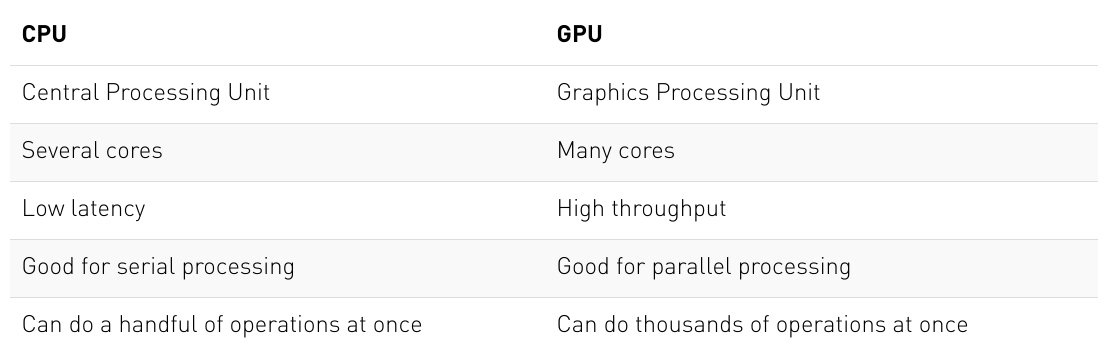

First, let's check whether you have a GPU available:

In [93]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? False


If you have a GPU on your computer but the command above returns False, make sure you have the correct CUDA-version installed. The `dl2024` environment comes with the CUDA 12.4, which is selected for the Snellius supercomputer. Please change it if necessary. On Google Colab, make sure that you have selected a GPU in your runtime setup (in the menu, check under `Runtime -> Change runtime type`).

By default, all tensors you create are stored on the CPU. We can push a tensor to the GPU by using the function `.to(...)`, or `.cuda()`. However, it is often a good practice to define a `device` object in your code which points to the GPU if you have one, and otherwise to the CPU. Then, you can write your code with respect to this device object, and it allows you to run the same code on both a CPU-only system, and one with a GPU. Let's try it below. We can specify the device as follows:

In [94]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cpu


In case you have a GPU, you should now see the attribute `device='cuda:0'` being printed next to your tensor. The zero next to cuda indicates that this is the zero-th GPU device on your computer. PyTorch also supports multi-GPU systems, but this you will only need once you have very big networks to train (if interested, see the [PyTorch documentation](https://pytorch.org/docs/stable/distributed.html#distributed-basics)). We can also compare the runtime of a large matrix multiplication on the CPU with a operation on the GPU:

In [95]:
import time

x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 3.82142s


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

Depending on the size of the operation and the CPU/GPU in your system, the speedup of this operation can be >50x. As `matmul` operations are very common in neural networks, we can already see the great benefit of training a NN on a GPU. The time estimate can be relatively noisy here because we haven't run it for multiple times. Feel free to extend this, but it also takes longer to run.

When generating random numbers, the seed between CPU and GPU is not synchronized. Hence, we need to set the seed on the GPU separately to ensure a reproducible code. Note that due to different GPU architectures, running the same code on different GPUs does not guarantee the same random numbers. Still, we don't want that our code gives us a different output every time we run it on the exact same hardware. Hence, we also set the seed on the GPU:

In [ ]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Conclusion
You've now practiced some of the basic operations in PyTorch, such as matrix multiplication, element-wise operations, reshaping, and broadcasting. PyTorch makes these operations easy to perform, even with more complex models and tensors. Keep exploring PyTorch by experimenting with more tensor operations and applying them to real-world tasks!